In [84]:
!pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
from ydata_profiling import ProfileReport

In [87]:
df=pd.read_csv("F:\my data science\ml_prac\myexperiments\datasets\sleeplifestyle.csv")


In [88]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [89]:

df['bp_Systolic']=df['Blood Pressure'].str.split('/',expand=True)[0]
df['bp_Diastolic']=df['Blood Pressure'].str.split('/',expand=True)[1]

In [90]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'bp_Systolic', 'bp_Diastolic'],
      dtype='object')

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
df.drop('Blood Pressure',axis=1,inplace=True)

In [93]:
encoder=LabelEncoder()

In [94]:
df['Sleep Disorder']=encoder.fit_transform(df['Sleep Disorder'])

In [95]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_Systolic,bp_Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,2,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90


In [96]:
df['Daily Steps'].unique()

array([ 4200, 10000,  3000,  3500,  8000,  4000,  4100,  6800,  5000,
        7000,  5500,  5200,  5600,  3300,  4800,  7500,  7300,  6200,
        6000,  3700], dtype=int64)

In [97]:
df['Daily Steps'].min()

3000

In [98]:
df['Daily Steps'].max()

10000

In [99]:

bins = [0,3000,5000,7000,10000]
group_names=['0-3000','3001-5000','5001-7000','7001-10000']
df['Daily Steps cat']=pd.cut(df['Daily Steps'],bins,labels=group_names)


In [100]:
df['Heart Rate'].min()

65

In [101]:
df['Heart Rate'].max()

86

In [102]:

bins = [65,70,75,80,86]
group_names=['65-70','71-75','76-80','81-86']
df['Heart Rate cat']=pd.cut(df['Heart Rate'],bins,labels=group_names)

In [103]:
df.drop('Person ID',axis=1,inplace=True)

In [104]:
df.drop('Daily Steps',axis=1,inplace=True)

In [105]:
df.drop(['Heart Rate'],axis=1,inplace=True)

In [106]:
df[['Gender', 'Occupation','BMI Category', 'bp_Systolic','bp_Diastolic','Daily Steps cat','Heart Rate cat']] = df[['Gender', 'Occupation','BMI Category','bp_Systolic','bp_Diastolic','Daily Steps cat','Heart Rate cat']].apply(LabelEncoder().fit_transform)

In [107]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Sleep Disorder,bp_Systolic,bp_Diastolic,Daily Steps cat,Heart Rate cat
0,1,27,9,6.1,6,42,6,3,2,8,7,1,2
1,1,28,1,6.2,6,60,8,0,2,7,5,3,1
2,1,28,1,6.2,6,60,8,0,2,7,5,3,1
3,1,28,6,5.9,4,30,8,2,1,16,13,0,3
4,1,28,6,5.9,4,30,8,2,1,16,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,1,16,16,2,0
370,0,59,5,8.0,9,75,3,3,1,16,16,2,0
371,0,59,5,8.1,9,75,3,3,1,16,16,2,0
372,0,59,5,8.1,9,75,3,3,1,16,16,2,0


In [111]:
df['Sleep Disorder'].unique()

array(['1', '0'], dtype=object)

In [109]:
df['Sleep Disorder']=df['Sleep Disorder'].map({0:'0',1:'1',2:'1'})

In [110]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Sleep Disorder,bp_Systolic,bp_Diastolic,Daily Steps cat,Heart Rate cat
0,1,27,9,6.1,6,42,6,3,1,8,7,1,2
1,1,28,1,6.2,6,60,8,0,1,7,5,3,1
2,1,28,1,6.2,6,60,8,0,1,7,5,3,1
3,1,28,6,5.9,4,30,8,2,1,16,13,0,3
4,1,28,6,5.9,4,30,8,2,1,16,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,1,16,16,2,0
370,0,59,5,8.0,9,75,3,3,1,16,16,2,0
371,0,59,5,8.1,9,75,3,3,1,16,16,2,0
372,0,59,5,8.1,9,75,3,3,1,16,16,2,0


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler=StandardScaler()

In [117]:
x=df.drop('Sleep Disorder',axis=1)
x.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'bp_Systolic', 'bp_Diastolic', 'Daily Steps cat', 'Heart Rate cat'],
      dtype='object')

In [119]:
x_scaled=scaler.fit_transform(x)

In [121]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [142]:
x_scaled

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,bp_Systolic,bp_Diastolic,Daily Steps cat,Heart Rate cat
0,0.989361,-1.753096,1.712741,-1.298887,-1.098280,-0.825418,0.347021,1.191629,-0.282323,-0.299599,-1.448926,0.559413
1,0.989361,-1.637643,-0.908497,-1.173036,-1.098280,0.039844,1.475592,-0.907284,-0.483444,-0.714599,1.101184,-0.113322
2,0.989361,-1.637643,-0.908497,-1.173036,-1.098280,0.039844,1.475592,-0.907284,-0.483444,-0.714599,1.101184,-0.113322
3,0.989361,-1.637643,0.729777,-1.550588,-2.771424,-1.402260,1.475592,0.491991,1.326648,0.945401,-2.723981,1.232148
4,0.989361,-1.637643,0.729777,-1.550588,-2.771424,-1.402260,1.475592,0.491991,1.326648,0.945401,-2.723981,1.232148
...,...,...,...,...,...,...,...,...,...,...,...,...
369,-1.010753,1.941401,0.402122,1.218127,1.411435,0.760896,-1.345836,1.191629,1.326648,1.567900,-0.173871,-0.786056
370,-1.010753,1.941401,0.402122,1.092276,1.411435,0.760896,-1.345836,1.191629,1.326648,1.567900,-0.173871,-0.786056
371,-1.010753,1.941401,0.402122,1.218127,1.411435,0.760896,-1.345836,1.191629,1.326648,1.567900,-0.173871,-0.786056
372,-1.010753,1.941401,0.402122,1.218127,1.411435,0.760896,-1.345836,1.191629,1.326648,1.567900,-0.173871,-0.786056


In [123]:
y=df['Sleep Disorder']
y

0      1
1      1
2      1
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: object

In [138]:
from sklearn.feature_selection import chi2,mutual_info_classif,mutual_info_regression,SelectKBest

In [124]:
cls=mutual_info_classif(x_scaled,y)

In [125]:
cls

array([0.00718787, 0.23926196, 0.1955809 , 0.28347031, 0.12503874,
       0.2749996 , 0.19885572, 0.11437539, 0.20163252, 0.19372307,
       0.08070728, 0.0580034 ])

In [131]:
feat_imp=pd.DataFrame(cls,x_scaled.columns)

<Axes: >

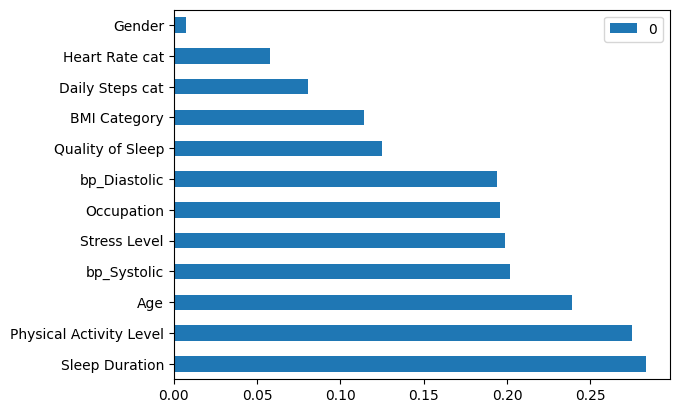

In [137]:
feat_imp.sort_values(by=[0],ascending=False).plot(kind='barh')

In [139]:
chi2_feat=SelectKBest(chi2,k=3)

In [144]:
k_best=chi2_feat.fit_transform(x,y)
k_best

array([[ 9., 42.,  3.],
       [ 1., 60.,  0.],
       [ 1., 60.,  0.],
       ...,
       [ 5., 75.,  3.],
       [ 5., 75.,  3.],
       [ 5., 75.,  3.]])